In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import  classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:/attrition_data.csv")

In [3]:
df = pd.DataFrame(df)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
# Handling missing values

In [7]:
df.NumCompaniesWorked.mean()

2.6948303347756775

In [8]:
df['NumCompaniesWorked'].fillna(2.6948,inplace=True)

In [9]:
df.TotalWorkingYears.mean()

11.279936378095888

In [10]:
df['TotalWorkingYears'].fillna(11.2799,inplace=True)

In [11]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [13]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [14]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(['float64','int64'])

In [15]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y


In [16]:
df_num['StandardHours'].value_counts()

8    4410
Name: StandardHours, dtype: int64

In [17]:
df_num['EmployeeCount'].value_counts()

1    4410
Name: EmployeeCount, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [21]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,0,2,2,1,0,0,1,0
1,1,1,1,1,0,6,2,0
2,0,1,1,4,1,7,1,0
3,0,0,1,1,1,1,1,0
4,0,2,1,3,1,7,2,0


In [22]:
df_num.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,6,2,1,1,1,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,10,1,1,2,1,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,17,4,1,3,4,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,2,5,1,4,3,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,10,1,1,5,1,23420,4.0,12,8,2,9.0,2,6,0,4


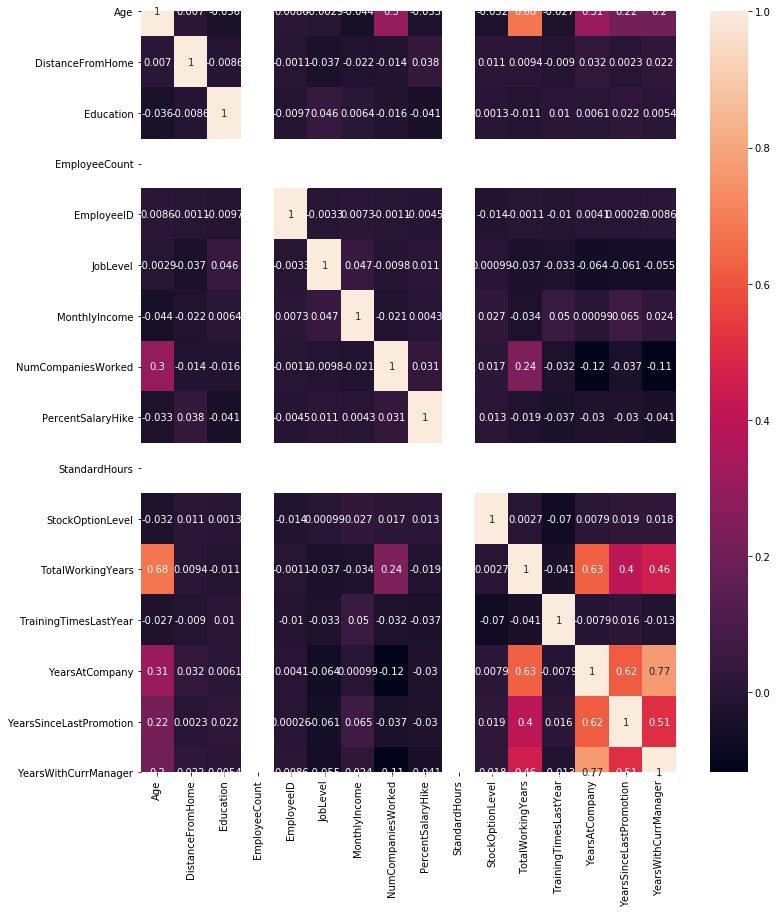

In [23]:
plt.figure(figsize = (12,14))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [24]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [25]:
df_new

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,51,6,2,1,1,1,131160,1.0,11,8,...,0,0,0,2,2,1,0,0,1,0
1,31,10,1,1,2,1,41890,0.0,23,8,...,1,4,1,1,1,1,0,6,2,0
2,32,17,4,1,3,4,193280,1.0,15,8,...,0,3,0,1,1,4,1,7,1,0
3,38,2,5,1,4,3,83210,3.0,11,8,...,7,5,0,0,1,1,1,1,1,0
4,32,10,1,1,5,1,23420,4.0,12,8,...,0,4,0,2,1,3,1,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,1,4406,1,60290,3.0,17,8,...,0,2,0,2,1,3,0,6,2,0
4406,29,2,4,1,4407,1,26790,2.0,15,8,...,0,2,0,2,1,3,1,2,0,0
4407,25,25,2,1,4408,2,37020,0.0,20,8,...,1,2,0,2,1,1,1,7,1,0
4408,42,18,2,1,4409,1,23980,0.0,14,8,...,7,8,0,2,2,3,1,2,0,0


[]

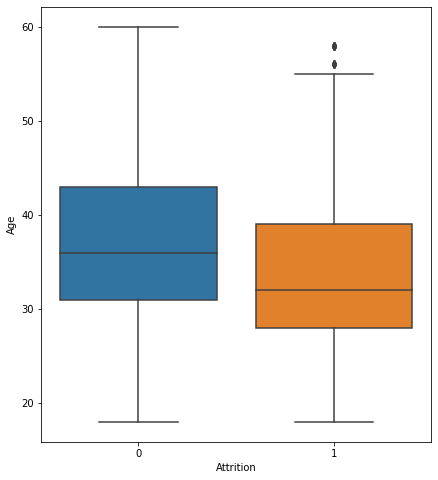

In [26]:
plt.figure(figsize=(7,8))
sns.boxplot(data=df_new,x='Attrition',y='Age')
plt.plot()

In [27]:
df_new[(df_new['Attrition']==1) & (df['Age'] > 57)]

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
337,58,24,3,1,338,2,43170,7.0,17,8,...,13,8,1,2,1,4,0,6,2,0
402,58,9,2,1,403,1,21530,9.0,11,8,...,0,0,1,1,2,5,1,7,0,0
442,58,9,2,1,443,4,59570,4.0,14,8,...,0,0,1,2,2,3,0,7,2,0
708,58,1,4,1,709,2,10090,7.0,13,8,...,5,9,1,2,2,5,1,7,1,0
1338,58,2,2,1,1339,1,43850,1.0,13,8,...,15,6,1,2,2,3,0,6,1,0
1807,58,24,3,1,1808,2,43170,7.0,17,8,...,13,8,1,2,1,4,0,6,2,0
1872,58,9,2,1,1873,1,21530,9.0,11,8,...,0,0,1,1,2,5,1,7,0,0
1912,58,9,2,1,1913,4,59570,4.0,14,8,...,0,0,1,2,2,3,0,7,2,0
2178,58,1,4,1,2179,2,10090,7.0,13,8,...,5,9,1,2,2,5,1,7,1,0
2808,58,2,2,1,2809,1,43850,1.0,13,8,...,15,6,1,2,2,3,0,6,1,0


Age


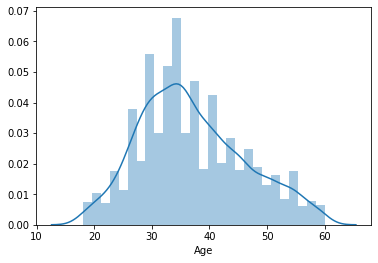

--------------------------------
DistanceFromHome


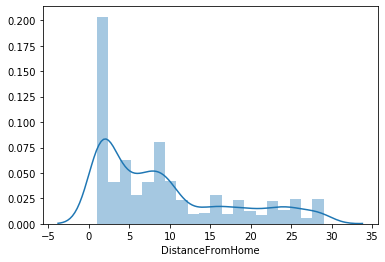

--------------------------------
Education


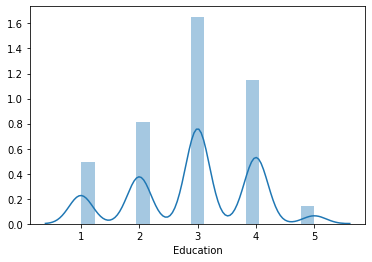

--------------------------------
EmployeeCount


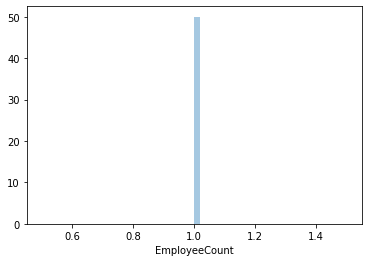

--------------------------------
EmployeeID


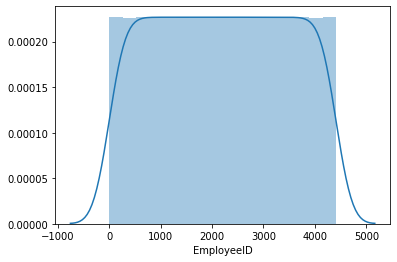

--------------------------------
JobLevel


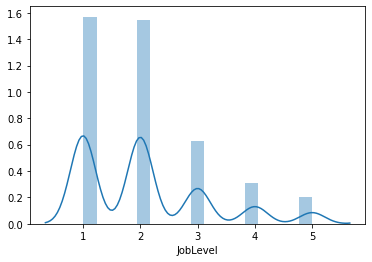

--------------------------------
MonthlyIncome


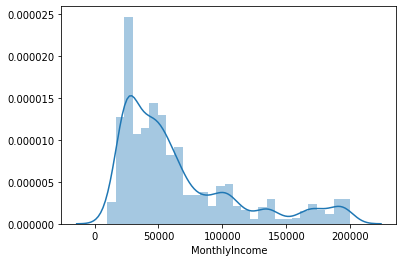

--------------------------------
NumCompaniesWorked


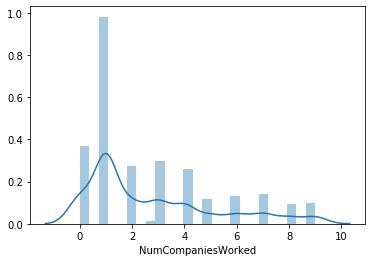

--------------------------------
PercentSalaryHike


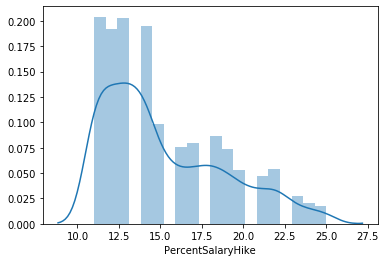

--------------------------------
StandardHours


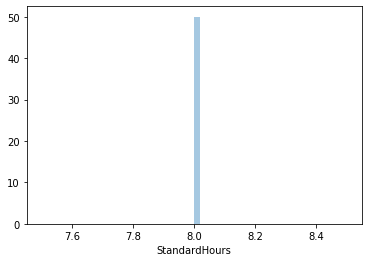

--------------------------------
StockOptionLevel


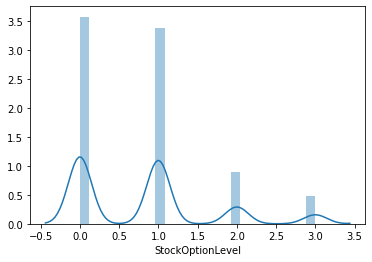

--------------------------------
TotalWorkingYears


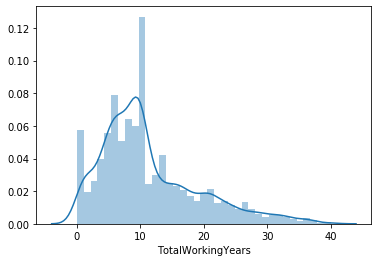

--------------------------------
TrainingTimesLastYear


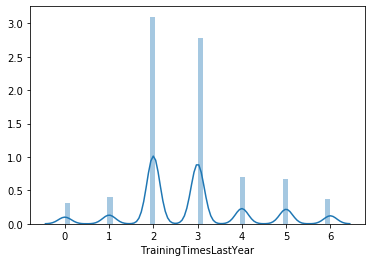

--------------------------------
YearsAtCompany


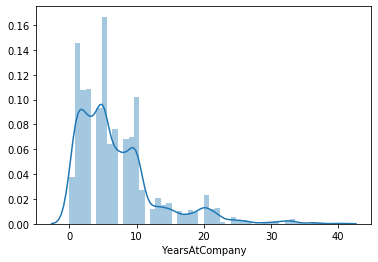

--------------------------------
YearsSinceLastPromotion


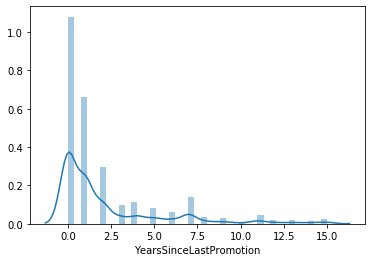

--------------------------------
YearsWithCurrManager


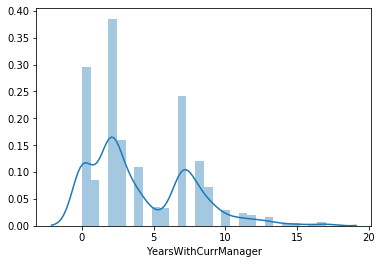

--------------------------------


In [28]:
for col in df_num:
    
    try:
        print(col)
        plt.figure()
        sns.distplot(df[col])
        plt.show()
    except:
        pass
    print('--------------------------------')

In [29]:
from scipy.stats import skew


In [30]:
df_num['Age'] = np.sqrt(df_num['Age'])

skewness 0.14091714041655268


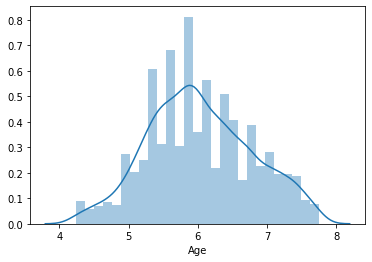

In [31]:
print('skewness',skew(df_num['Age']))
sns.distplot(df_num['Age'])
plt.show()

skewness -0.2457530653505896


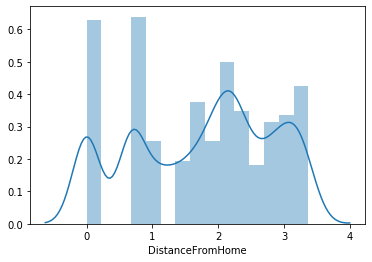

In [32]:
df_num['DistanceFromHome'] = np.log(df_num['DistanceFromHome'])
print('skewness',skew(df_num['DistanceFromHome']))
sns.distplot(df_num['DistanceFromHome'])
plt.show()

skewness 0.2859001768720216


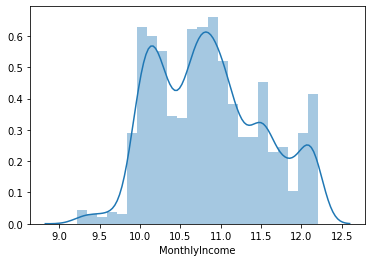

In [33]:
df_num['MonthlyIncome'] = np.log(df_num['MonthlyIncome'])
print('skewness',skew(df_num['MonthlyIncome']))
sns.distplot(df_num['MonthlyIncome'])
plt.show()

skewness 0.5933163372986388


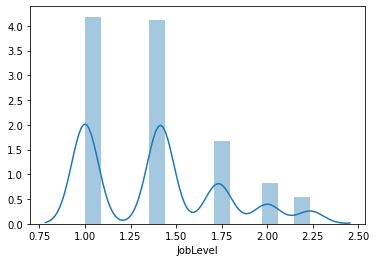

In [34]:
df_num['JobLevel'] = np.sqrt(df_num['JobLevel'])
print('skewness',skew(df_num['JobLevel']))
sns.distplot(df_num['JobLevel'])
plt.show()

skewness 0.6547426150827748


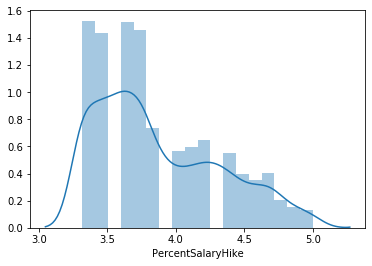

In [35]:
df_num['PercentSalaryHike'] = np.sqrt(df_num['PercentSalaryHike'])
print('skewness',skew(df_num['PercentSalaryHike']))
sns.distplot(df_num['PercentSalaryHike'])
plt.show()

skewness 0.17622454795391707


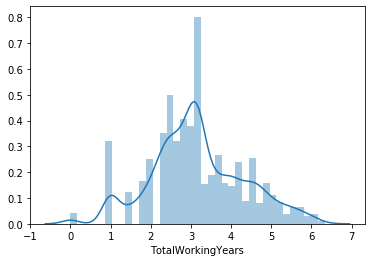

In [36]:
df_num['TotalWorkingYears'] = np.sqrt(df_num['TotalWorkingYears'])
print('skewness',skew(df_num['TotalWorkingYears']))
sns.distplot(df_num['TotalWorkingYears'])
plt.show()

skewness 0.42639886451266434


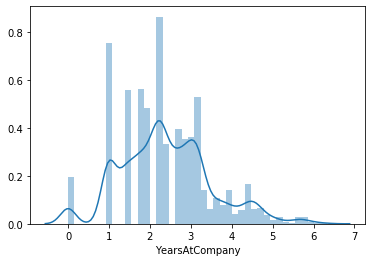

In [37]:
df_num['YearsAtCompany'] = np.sqrt(df_num['YearsAtCompany'])
print('skewness',skew(df_num['YearsAtCompany']))
sns.distplot(df_num['YearsAtCompany'])
plt.show()

skewness -0.25435094872554753


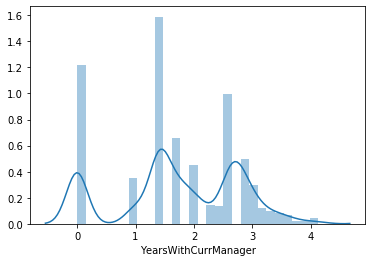

In [38]:
df_num['YearsWithCurrManager'] = np.sqrt(df_num['YearsWithCurrManager'])
print('skewness',skew(df_num['YearsWithCurrManager']))
sns.distplot(df_num['YearsWithCurrManager'])
plt.show()

Attrition


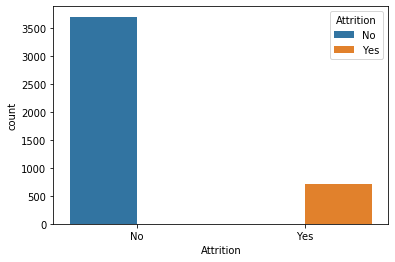

--------------------------------
BusinessTravel


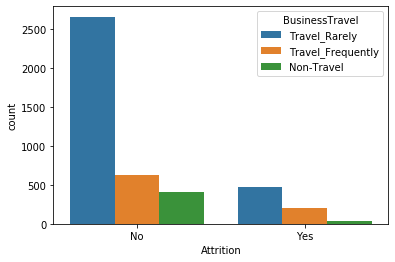

--------------------------------
Department


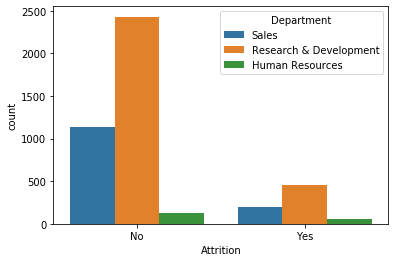

--------------------------------
EducationField


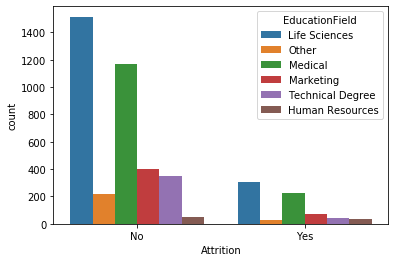

--------------------------------
Gender


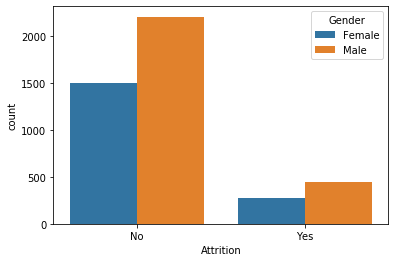

--------------------------------
JobRole


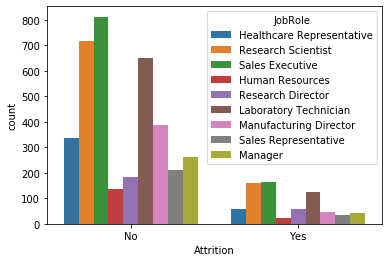

--------------------------------
MaritalStatus


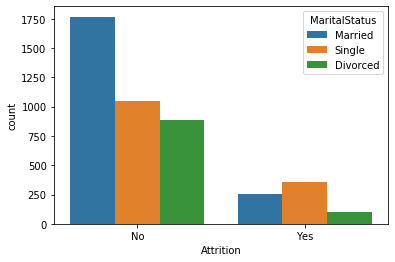

--------------------------------
Over18


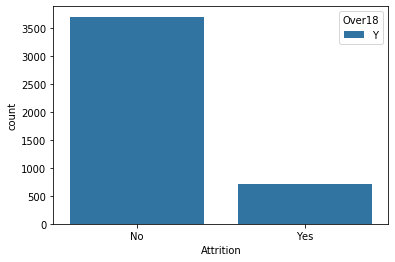

--------------------------------


In [39]:
for col in df_cat:
    
    try:
        print(col)
        plt.figure()
        sns.countplot(data=df,x='Attrition',hue=col)
        plt.show()
    except:
        pass
    print('--------------------------------')

In [40]:
df_new = pd.concat([df_num,df_cat],axis=1)

Age


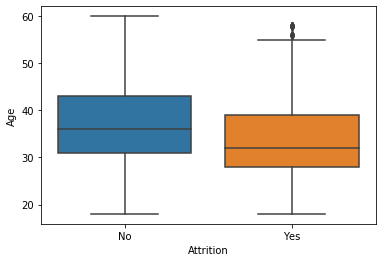

DistanceFromHome


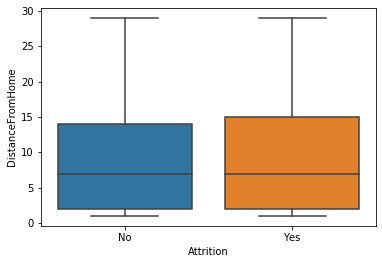

Education


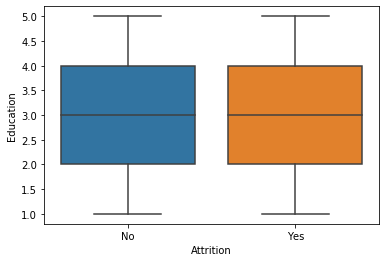

EmployeeCount


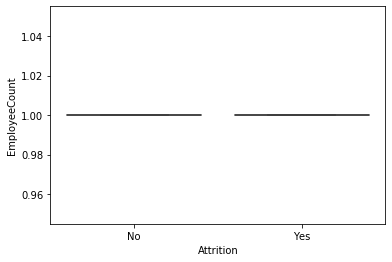

EmployeeID


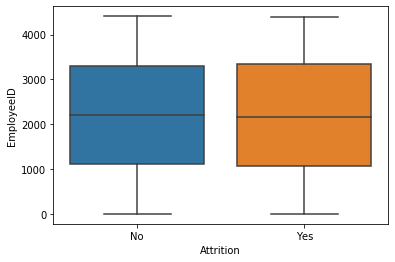

JobLevel


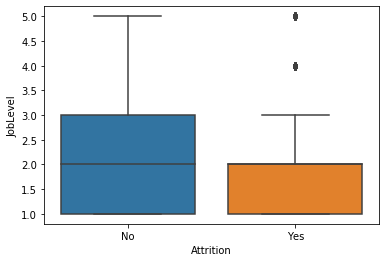

MonthlyIncome


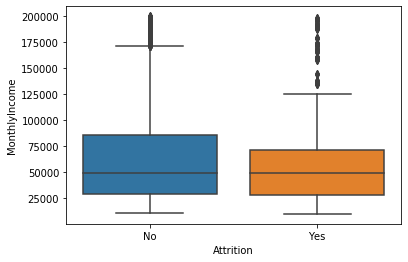

NumCompaniesWorked


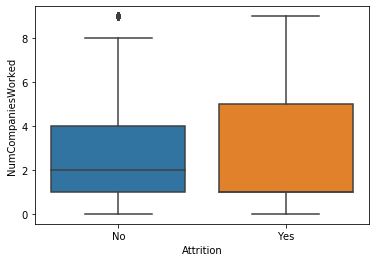

PercentSalaryHike


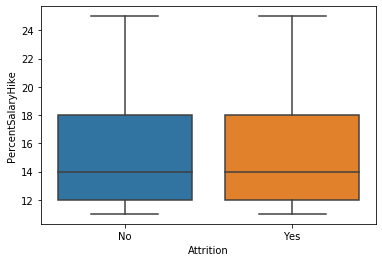

StandardHours


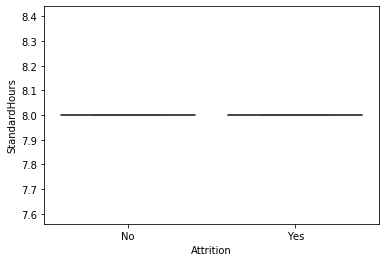

StockOptionLevel


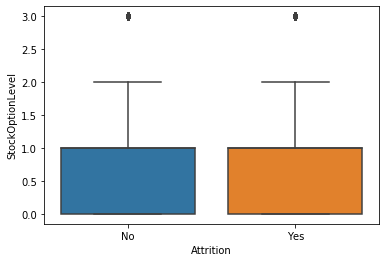

TotalWorkingYears


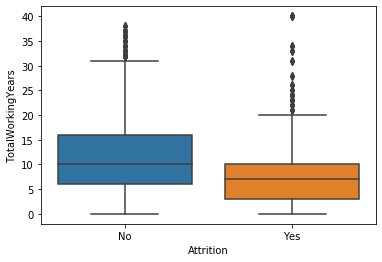

TrainingTimesLastYear


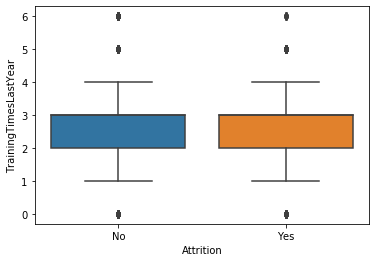

YearsAtCompany


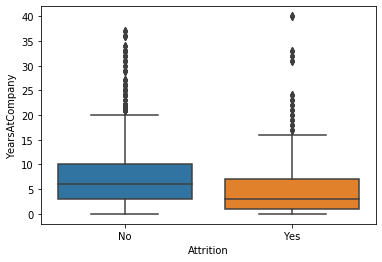

YearsSinceLastPromotion


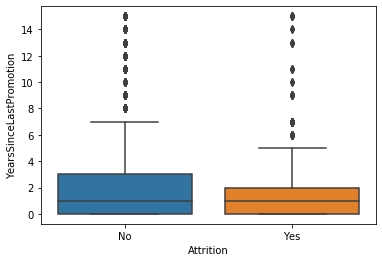

YearsWithCurrManager


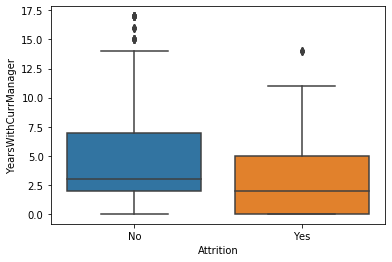

In [41]:
for col in df_num:
        print(col)
        plt.figure()
        sns.boxplot(data=df,y=col,x='Attrition')
        plt.show()
    

In [42]:
df_new[(df_new['Attrition']==1) & (df['StockOptionLevel'] >2.8)]

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
124,5.099020,2.639057,3,1,125,1.414214,11.226576,0.0000,4.242641,8,...,0,2.000000,1,1,2,1,1,3,2,0
255,4.472136,0.000000,3,1,256,2.236068,11.028742,1.0000,3.464102,8,...,1,1.000000,1,2,1,1,1,8,2,0
282,5.291503,0.693147,4,1,283,1.732051,9.940302,7.0000,4.242641,8,...,3,2.645751,1,2,2,1,1,6,2,0
289,6.480741,2.302585,1,1,290,1.000000,10.821776,6.0000,4.582576,8,...,2,1.414214,1,1,1,1,0,7,0,0
304,5.744563,0.000000,2,1,305,1.732051,10.265001,1.0000,4.123106,8,...,7,2.828427,1,2,1,3,1,2,2,0
467,5.916080,3.178054,3,1,468,1.732051,9.937889,1.0000,3.605551,8,...,0,1.414214,1,2,2,3,1,0,0,0
578,5.385165,1.791759,3,1,579,1.000000,10.018600,1.0000,3.464102,8,...,3,3.162278,1,2,1,1,1,7,1,0
688,6.324555,2.079442,1,1,689,1.000000,10.999597,2.0000,3.605551,8,...,1,0.000000,1,2,2,4,1,2,2,0
717,7.416198,2.944439,3,1,718,1.000000,10.753638,6.0000,3.741657,8,...,3,2.828427,1,2,1,5,1,1,2,0
775,5.567764,0.693147,3,1,776,1.414214,10.155024,1.0000,3.605551,8,...,4,2.645751,1,1,2,3,1,7,2,0


[]

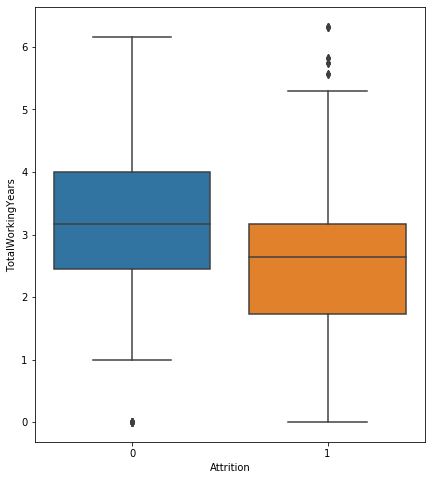

In [43]:
plt.figure(figsize=(7,8))
sns.boxplot(data=df_new,x='Attrition',y='TotalWorkingYears')
plt.plot()

[]

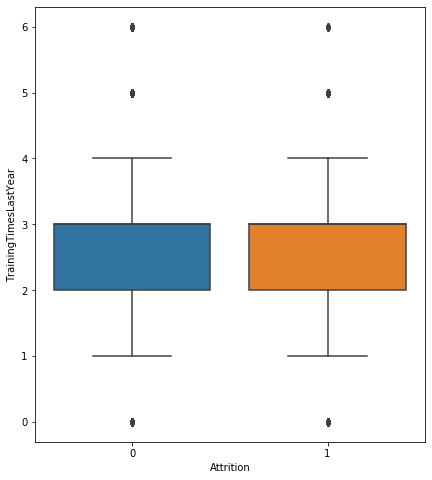

In [44]:
plt.figure(figsize=(7,8))
sns.boxplot(data=df_new,x='Attrition',y='TrainingTimesLastYear')
plt.plot()

In [45]:
df_new[(df_new['Attrition']==1) & (df['TrainingTimesLastYear'] >5)]["TrainingTimesLastYear"]

404     6
1254    6
1262    6
1319    6
1874    6
2724    6
2732    6
2789    6
3344    6
4194    6
4202    6
4259    6
Name: TrainingTimesLastYear, dtype: int64

[]

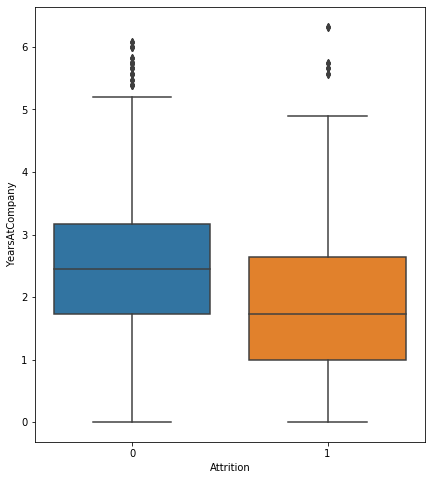

In [46]:
plt.figure(figsize=(7,8))
sns.boxplot(data=df_new,x='Attrition',y='YearsAtCompany')
plt.plot()

In [47]:
df_new[(df_new['Attrition']==1) & (df['YearsAtCompany'] >35)]

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
1338,7.615773,0.693147,2,1,1339,1.0,10.68853,1.0,3.605551,8,...,15,2.44949,1,2,2,3,0,6,1,0
2808,7.615773,0.693147,2,1,2809,1.0,10.68853,1.0,3.605551,8,...,15,2.44949,1,2,2,3,0,6,1,0
4278,7.615773,0.693147,2,1,4279,1.0,10.68853,1.0,3.605551,8,...,15,2.44949,1,2,2,3,0,6,1,0


In [48]:
df_new.drop([1338,2808,4278],inplace=True)

In [49]:
X = df_new.iloc[:,:-8]
y = df_new.iloc[:,-8]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [51]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [52]:
lr = LogisticRegression(random_state=1)

In [53]:
classify(lr)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1132
           1       0.57      0.02      0.04       191

    accuracy                           0.86      1323
   macro avg       0.71      0.51      0.48      1323
weighted avg       0.82      0.86      0.80      1323



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
dt = DecisionTreeClassifier()

In [55]:
classify(dt)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1132
           1       0.85      0.92      0.88       191

    accuracy                           0.97      1323
   macro avg       0.92      0.94      0.93      1323
weighted avg       0.97      0.97      0.97      1323



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
dt.feature_importances_

array([0.12627523, 0.059777  , 0.06578801, 0.        , 0.01703958,
       0.03709276, 0.16332156, 0.08301563, 0.09388189, 0.        ,
       0.00718328, 0.16002126, 0.03492496, 0.06687031, 0.04994397,
       0.03486456])

In [57]:
lsv = LinearSVC(random_state=1)

In [58]:
classify(lsv)

              precision    recall  f1-score   support

           0       0.86      0.13      0.22      1132
           1       0.15      0.88      0.25       191

    accuracy                           0.24      1323
   macro avg       0.50      0.50      0.24      1323
weighted avg       0.76      0.24      0.23      1323



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [59]:
lsv2 = LinearSVC(C=.5,random_state=1)

In [60]:
classify(lsv2)

              precision    recall  f1-score   support

           0       0.87      0.38      0.53      1132
           1       0.16      0.68      0.25       191

    accuracy                           0.42      1323
   macro avg       0.52      0.53      0.39      1323
weighted avg       0.77      0.42      0.49      1323



LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [61]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [62]:
def feature_test(criteria,count,model):
    test = SelectKBest(score_func=criteria,k=count)
    X_train_new = test.fit_transform(X_train,y_train)
    X_test_new = test.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred = model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(test.get_support())
    return model

In [63]:
feature_test(f_regression,3,lr)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1132
           1       0.33      0.01      0.02       191

    accuracy                           0.85      1323
   macro avg       0.59      0.50      0.47      1323
weighted avg       0.78      0.85      0.79      1323

[False False False False False False False False False False False  True
 False  True False  True]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
feature_test(f_regression,10,dt)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1132
           1       0.85      0.94      0.89       191

    accuracy                           0.97      1323
   macro avg       0.92      0.95      0.94      1323
weighted avg       0.97      0.97      0.97      1323

[ True False False False False  True  True  True  True False False  True
  True  True  True  True]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
feature_test(f_regression,8,lsv)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1132
           1       0.00      0.00      0.00       191

    accuracy                           0.86      1323
   macro avg       0.43      0.50      0.46      1323
weighted avg       0.73      0.86      0.79      1323

[ True False False False False False  True False  True False False  True
  True  True  True  True]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [73]:
feature_test(chi2,16,lsv)

              precision    recall  f1-score   support

           0       0.86      0.13      0.22      1132
           1       0.15      0.88      0.25       191

    accuracy                           0.24      1323
   macro avg       0.50      0.50      0.24      1323
weighted avg       0.76      0.24      0.23      1323

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [76]:
feature_test(chi2,10,lsv2)

              precision    recall  f1-score   support

           0       0.87      0.45      0.59      1132
           1       0.15      0.59      0.24       191

    accuracy                           0.47      1323
   macro avg       0.51      0.52      0.42      1323
weighted avg       0.76      0.47      0.54      1323

[ True False False False  True False False  True  True False  True  True
  True  True  True  True]


LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [77]:
from sklearn.ensemble import AdaBoostClassifier


In [78]:
ada = AdaBoostClassifier(n_estimators=100)      # 100 decision stumps

In [83]:
feature_test(chi2,12,ada)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1132
           1       0.57      0.13      0.21       191

    accuracy                           0.86      1323
   macro avg       0.72      0.56      0.57      1323
weighted avg       0.83      0.86      0.82      1323

[ True False  True False  True False  True  True  True False  True  True
  True  True  True  True]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [86]:
feature_test(f_regression,10,ada)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1132
           1       0.55      0.15      0.24       191

    accuracy                           0.86      1323
   macro avg       0.71      0.57      0.58      1323
weighted avg       0.83      0.86      0.82      1323

[ True False False False False  True  True  True  True False False  True
  True  True  True  True]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [85]:
from sklearn.ensemble import GradientBoostingClassifier


In [87]:
gb = GradientBoostingClassifier(n_estimators=100)


In [88]:
feature_test(f_regression,10,gb)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1132
           1       0.81      0.27      0.40       191

    accuracy                           0.89      1323
   macro avg       0.85      0.63      0.67      1323
weighted avg       0.88      0.89      0.86      1323

[ True False False False False  True  True  True  True False False  True
  True  True  True  True]


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
feature_test(chi2,12,gb)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1132
           1       0.74      0.21      0.33       191

    accuracy                           0.88      1323
   macro avg       0.81      0.60      0.63      1323
weighted avg       0.86      0.88      0.84      1323

[ True False  True False  True False  True  True  True False  True  True
  True  True  True  True]


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
from xgboost import XGBClassifier


In [92]:
xgb = XGBClassifier(n_estimators=200,reg_alpha=1)


In [93]:
feature_test(chi2,12,xgb)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1132
           1       0.76      0.27      0.40       191

    accuracy                           0.88      1323
   macro avg       0.82      0.63      0.67      1323
weighted avg       0.87      0.88      0.86      1323

[ True False  True False  True False  True  True  True False  True  True
  True  True  True  True]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [94]:
feature_test(f_regression,12,gb)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1132
           1       0.85      0.27      0.41       191

    accuracy                           0.89      1323
   macro avg       0.87      0.63      0.68      1323
weighted avg       0.88      0.89      0.86      1323

[ True False  True False False  True  True  True  True False  True  True
  True  True  True  True]


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)